In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

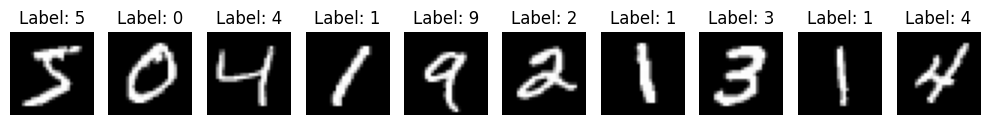

In [4]:
import matplotlib.pyplot as plt

# plt.imshow(X_train[0], cmap='gray')
def print_images(X, y, n: int):
  """Print n images in a row"""
  plt.figure(figsize=(10, 5))
  for i in range(n):
      plt.subplot(1, n, i+1)
      plt.imshow(X[i], cmap='gray')
      plt.title(f"Label: {y[i]}")
      plt.axis('off')
  plt.tight_layout()
  plt.show()

print_images(X_train, y_train, 10)

In [5]:
# # Our data only have two possibilities 1.The pixel is turned ON, 2.The pixel is turned OFF
# # We don't need the actual value of that pixel. Lets make that happen

# import pandas as pd


# for i in range(60000):
#   X_train[i] = np.where(X_train[i] > 0, 1, 0)

# For neural network to produce better result we try to make out data in similar range
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

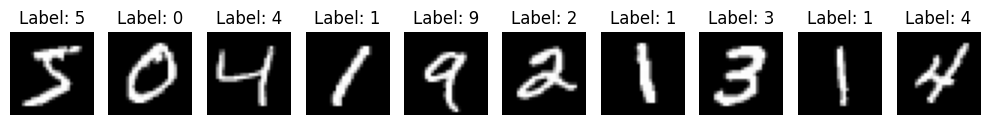

In [7]:
print_images(X_train, y_train, 10)

In [8]:
# Right now our data is in 2D array we first need to flatten that array

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/user/mnist-dataset/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15


2024-06-09 12:56:35.169041: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.4853

2024-06-09 12:56:43.683938: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8504 - loss: 0.4845 - val_accuracy: 0.9622 - val_loss: 0.1322
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9680 - loss: 0.1057 - val_accuracy: 0.9667 - val_loss: 0.1134
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9781 - loss: 0.0708 - val_accuracy: 0.9680 - val_loss: 0.1061
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.9755 - val_loss: 0.0920
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9741 - val_loss: 0.1025
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0361 - val_accuracy: 0.9758 - val_loss: 0.0963
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9916 - loss: 0.0279 - val_accuracy: 0.9702 - val_loss: 0.1314
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.0286 - val_a

In [12]:
y_pred = model.predict(X_test)

 58/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2024-06-09 12:59:03.834276: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
y_pred

array([[9.2929718e-17, 7.3052103e-12, 5.7338600e-12, ..., 9.9999994e-01,
        8.5624223e-14, 8.6958024e-10],
       [2.5329938e-10, 2.7224418e-12, 9.9999994e-01, ..., 4.2772941e-09,
        2.8997579e-10, 1.8282873e-12],
       [8.6274094e-06, 9.9979401e-01, 1.4181614e-04, ..., 3.0577077e-05,
        1.1255224e-05, 1.0788875e-06],
       ...,
       [6.9845960e-21, 2.6916582e-16, 3.0671781e-15, ..., 1.0971519e-12,
        1.8864296e-14, 1.0430447e-09],
       [1.0480410e-11, 4.1276207e-16, 3.8526526e-16, ..., 1.8214078e-14,
        3.6683004e-11, 4.0177180e-12],
       [2.9886930e-13, 7.0240409e-19, 3.7846104e-17, ..., 8.5543643e-24,
        8.6776913e-14, 2.0586866e-16]], dtype=float32)

In [14]:
y_pred = y_pred.argmax(axis=1)

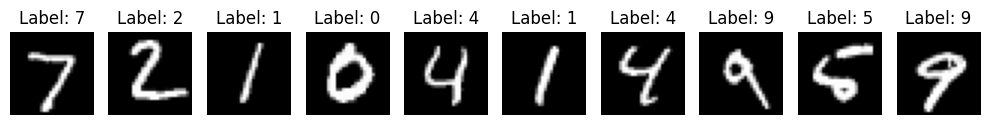

In [15]:
print_images(X_test, y_pred, 10)

In [16]:
from sklearn.metrics import accuracy_score

ac_score = accuracy_score(y_test, y_pred)
print(ac_score)

0.9806


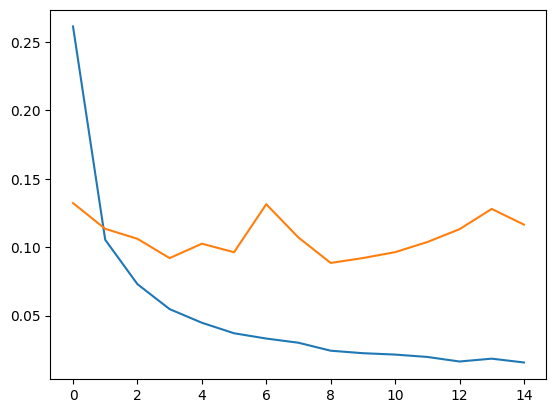

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

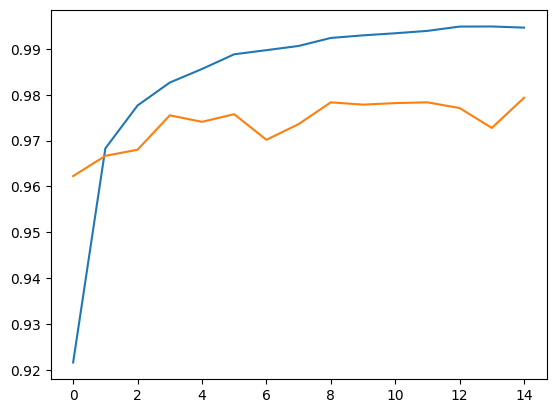

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
#  Prediction

model.predict(X_test[15].reshape(1, 28, 28)).argmax(axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


5

In [20]:
y_test[15]

5

In [25]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']